In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import random
import commands
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from joblib import Parallel as P
from joblib import delayed as dl

In [3]:
import os

dfs = []
for file in os.listdir("./private/"):
    if file.endswith(".csv"):
        dfs.append(pd.read_csv("./private/"+file, header=None, index_col=0))

In [4]:
df_y = pd.concat(dfs).drop_duplicates()
df_y.index.name = 'id'
df_y.columns = ["y"]

In [5]:
df_X = pd.read_csv("./X_private.csv", index_col=0)

In [45]:
SIZE = 7000

In [46]:
y_train_df = df_y.iloc[:SIZE]
x_train_df = df_X.loc[y_train_df.index]

train_df = pd.concat([y_train_df, x_train_df], axis=1)

In [47]:
y_test_df = df_y.iloc[SIZE:SIZE + 7000]
x_test_df = df_X.loc[y_test_df.index]

test_df = pd.concat([y_test_df, x_test_df], axis=1)

In [48]:
pool_df = df_X.drop(y_train_df.index)

In [49]:
from sklearn.cluster import Birch
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
regr = GradientBoostingRegressor(n_estimators=2800, max_depth=5, learning_rate=0.2, random_state=300)
x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
regr.fit(x_train, y_train)
# score = rmse(y_test, regr.predict(x_test))
# scores.append(score)

## error predictor
y_error = np.abs(y_train - regr.predict(x_train))
regr.fit(x_train, y_error)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.2, loss='ls',
             max_depth=5, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2800,
             random_state=300, subsample=1.0, verbose=0, warm_start=False)

In [151]:
x_pool = pool_df.sample(100000)
y_pool_error = regr.predict(x_pool)

In [152]:
# sorted_idx = np.argsort(y_pool_error)
arange = np.arange(len(y_pool_error))
thresh_idx = y_pool_error > np.mean(y_pool_error) + 2*np.std(y_pool_error)
target_idx = arange[thresh_idx]
target_pool_x = x_pool.iloc[target_idx]
target_pool_y_error = y_pool_error[thresh_idx]

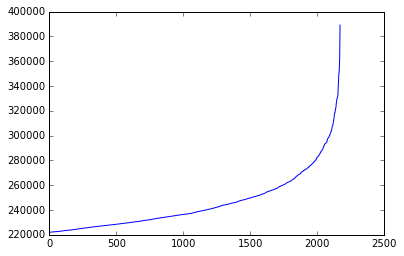

In [153]:
plt.plot(np.sort(target_pool_y_error))

In [154]:
minibatch = MiniBatchKMeans(n_clusters=300, batch_size=600)

In [155]:
minibatch.fit(target_pool_x)
uniq,inverse,counts = np.unique(minibatch.labels_, return_inverse=True, return_counts=True)
density = counts/float(len(target_x))
target_pool_density = density[minibatch.labels_]

fi = target_pool_density*target_pool_y_error
max300 = np.argsort(fi)[-200:]

target_x = target_pool_x.iloc[max300]

In [172]:
targed_index = []
for i in np.argsort(counts)[-20:]:
    targed_index += list(((target_pool_x[uniq[i] == minibatch.labels_]).index))

In [174]:
len(targed_index)

288

In [189]:
from sklearn.cross_validation import cross_val_score

In [ ]:
cross_val_score()

In [ ]:
def cv_score(estimator, x, y):
    ind = KFold(len(x), n_folds = 3, shuffle = True)
    
    score = 0

    for train_ind, test_ind in KFold(len(x), n_folds = 3, shuffle = True):
        x_train, x_test = x[train_ind], x[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]
        estimator.fit(x_train, y_train)
        
        y_pred = estimator.predict(x_test)
        score += mean_squared_error(y_test, y_pred)
    
    return np.sqrt(score / 3.0)


In [ ]:
ind = KFold(len(x), n_folds = 3, shuffle = True)

for train_ind, test_ind in KFold(len(x), n_folds = 3, shuffle = True):
    x_train, x_test = x[train_ind], x[test_ind]
    y_train, y_test = y[train_ind], y[test_ind]
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_mse += mean_squared_error(y_gb, y_test)
score = np.sqrt(gb_mse / 3.0)


In [150]:
import random

In [178]:
np.array(range(100)).sample(10)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [180]:
np.random.sample(10)

array([ 0.82800188,  0.56074288,  0.66606751,  0.7467582 ,  0.78481349,
        0.70412856,  0.0888286 ,  0.91579899,  0.91100164,  0.94479108])

In [187]:
np.random.choice([1,2,3], 2, replace=False)

array([2, 3])

In [188]:
random.sample([1,2,3], 4)

ValueError: sample larger than population

In [126]:
# target_pool_x
# target_pool_density
# target_pool_y_error

In [138]:
fi = target_pool_density*target_pool_y_error
max300 = np.argsort(fi)[-200:]

In [139]:
target_x = target_pool_x.iloc[max300]

In [140]:
target_x

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
id,,,,,,,,,,
275062,4.031688,4.336272,1.186491,1.389873,2.520061,3.289914,2.052517,2.286284,2.953854,0.907174
18083,1.855344,2.905103,1.049499,2.450065,3.102677,1.851105,3.816700,2.826285,4.188971,2.158486
988277,4.100818,4.479436,3.195098,4.727710,3.954484,4.636168,3.051225,3.708196,1.451083,1.570977
839547,4.127689,4.263057,3.437074,3.527570,2.794823,2.913432,3.216707,3.036106,3.336881,3.219157
72492,2.861672,3.096226,0.950809,3.315071,3.036742,2.333655,2.212129,1.275586,2.050158,3.695409
16826,2.960978,4.709596,1.414252,4.412884,3.783606,0.218571,4.352095,1.011921,0.600149,1.793956
341277,2.272226,1.500254,1.235395,0.916075,2.170392,1.402976,3.598486,1.528519,2.692344,3.026489
859145,4.327741,3.342099,2.017657,4.302191,2.488933,2.813314,3.995887,2.559024,2.835812,2.919200
579555,1.705156,4.433527,1.180599,2.796052,3.184135,1.990399,1.857481,3.894472,3.814858,1.340796


array([ 2626.23597222,  4472.86579604,  1708.58460956, ...,  2242.27145094,
        1896.13682359,  4431.82537805])

In [41]:
len(pool_df)

980000

In [40]:
minibatch = MiniBatchKMeans(n_clusters=300, batch_size=3000, init_size=6*1000)
minibatch.fit(pool_df)
print len(np.unique(minibatch.labels_))
uniq,inverse,counts = np.unique(minibatch.labels_, return_inverse=True, return_counts=True)
plt.hist(counts/float(70000))

KeyboardInterrupt: 

In [34]:
#subcluster_labels_

300

(array([  5.,  16.,  25.,  42.,  48.,  67.,  42.,  27.,  21.,   7.]),
 array([ 0.00245714,  0.00262714,  0.00279714,  0.00296714,  0.00313714,
         0.00330714,  0.00347714,  0.00364714,  0.00381714,  0.00398714,
         0.00415714]),
 <a list of 10 Patch objects>)

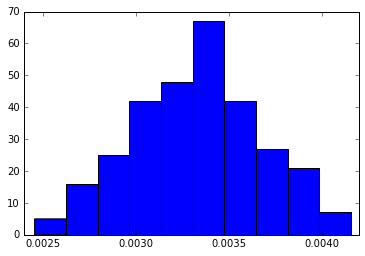